# >>> The Traveling Salesperson Problem

In [2]:
from __future__ import division
%pylab --no-import-all inline
import matplotlib.pyplot as plt
import random
import time
import itertools
import urllib
import csv

Populating the interactive namespace from numpy and matplotlib


# >>> All Tours Algorithm (`alltours_tsp`)

In [30]:
Point = complex
City  = Point

def X(point):                                 #"The x coordinate of a point."
    return point.real

def Y(point):                                 #"The y coordinate of a point."
    return point.imag

def distance(A, B):                           # "The distance between two points."
    return abs(A - B)

def tour_length(tour):                       #"The total of distances between each pair of consecutive cities in the tour."
    return sum(distance(tour[i], tour[i-1]) for i in range(len(tour)))

def alltours_tsp(cities):                    #"Generate all possible tours of the cities and choose the shortest tour."
    return shortest_tour(alltours(cities))

def shortest_tour(tours):                    #"Choose the tour with the minimum tour length."
    return min(tours, key=tour_length)

def alltours(cities):                        #"Return a list of permutation of cities, each starting with the same city."
    start = first(cities)
    return [[start] + Tour(rest) for rest in itertools.permutations(cities - {start})]

def first(collection):                       #"Start iterating over collection, and return the first element."
    return next(iter(collection))
            
def Cities(n, width=900, height=600, seed=42): #"Make a set of n cities, each with random coordinates within a (width x height) rectangle."
    random.seed(seed * n)
    return frozenset(City(random.randrange(width), random.randrange(height))for c in range(n))




Tour = list  # Tours are implemented as lists of cities
#A = City(3, 0)
#B = City(0, 4)
#print(distance(A, B))
#cities = {1, 2, 3}
#print(list(alltours(cities)))
#print(exact_algorithm(Cities(8)))
#tour_length(exact_algorithm(Cities(8)))

### Plotting Tours 

In [31]:
def plot_tour(tour):
    "Plot the cities as circles and the tour as lines between them. Start city is red square."
    start = tour[0]
    plot_lines(tour+ [start])
    plot_lines([start], 'rs') # Mark the start city with a red square

def plot_lines(points, style='bo-'):
    "Plot lines to connect a series of points."
    plt.plot(list(map(X, points)), list(map(Y, points)), style)
    plt.axis('scaled'); plt.axis('off')

    
def plot_tsp(algorithm, cities):
    "Apply a TSP algorithm to cities, plot the resulting tour, and print information."
    # Find the solution and time how long it takes
    #t0 = time.clock()
    t0 = time.process_time()
    tour = algorithm(cities)
    
    for (label, p) in enumerate(tour):
        plt.text(X(p), Y(p), '  '+str(label))
        
    #t1 = time.clock()
    t1 = time.process_time()
    assert valid_tour(tour, cities)
    plot_tour(tour); plt.show()
    print("{} city tour with length {:.1f} in {:.3f} secs for {}"
          .format(len(tour), tour_length(tour), t1 - t0, algorithm.__name__))
    
    
def valid_tour(tour, cities):
    "Is tour a valid tour for these cities?"
    return set(tour) == set(cities) and len(tour) == len(cities)


def plot_algorithm(algorithm, cities):
    "Apply a TSP algorithm to cities, plot the resulting tour, and print information."
    # Find the solution and time how long it takes
    t0 = time.process_time()
    tour = algorithm(cities)
    
    for (label, p) in enumerate(tour):
        plt.text(X(p), Y(p), '  '+str(label))
    
    t1 = time.process_time()
    assert valid_tour(tour, cities)
    plot_tour(tour); plt.show()
    print("{} city tour with length {:.1f} in {:.3f} secs for {}"
          .format(len(tour), tour_length(tour), t1 - t0, algorithm.__name__))

# Approximate Algorithms

# >>> Nearest Neighbor Algorithm (`nn_tsp`)

In [32]:
def nn_tsp(cities, start=None):
    """Start at 1st city; at each step extend the tour by moving to the unvisted nearest neighbor"""
    if start is None: start = first(cities)
    tour = [start]
    unvisited = set(cities - {start})
    while unvisited:
        C = nearest_neighbor(tour[-1], unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour

def nearest_neighbor(A, cities):
    "Find the city in cities that is nearest to city A."
    return min(cities, key=lambda c: distance(c, A))

def repeated_nn_tsp(cities, repetitions=100):
    "Repeat the nn_tsp algorithm starting from specified number of cities; return the shortest tour."
    return shortest_tour(nn_tsp(cities, start) for start in sample(cities, repetitions))

def sample(population, k, seed = 42):
    "Return a list of k elements sampled from population. Set random.seed with seed."
    if k is None or k > len(population): 
        return population
    random.seed(len(population) * k * seed)
    return random.sample(population, k)

def length_ratio(cities): 
    "The ratio of the tour lengths for nearest_neighbor_algorithm and exact_algorithm algorithms."
    return tour_length(nearest_neighbor_algorithm(cities)) / tour_length(exact_algorithm(cities))

#The ratio of `1.0` means 2 algorithms gives (optimal) result; that happened 5 times out of 10.other times, nn is 15% worse
#sorted(length_ratio(Cities(8, seed=i)) for i in range(11))

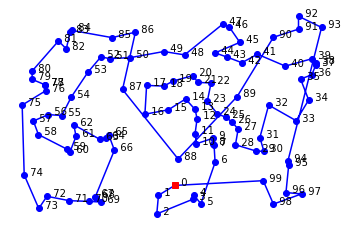

100 city tour with length 6734.1 in 0.031 secs for nn_tsp


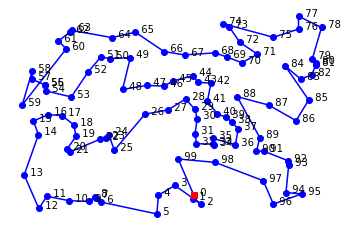

100 city tour with length 5912.6 in 0.156 secs for repeated_nn_tsp


In [20]:
# Compare nn_tsp to repeated_nn_tsp
plot_tsp(nn_tsp, Cities(100))
plot_tsp(repeated_nn_tsp, Cities(100))

Let's compare with 1, 10, and 100 starting cities on a 300 city map:

In [21]:
def repeat_10_nn_tsp(cities): return repeated_nn_tsp(cities, 10)
def repeat_100_nn_tsp(cities): return repeated_nn_tsp(cities, 100)

In [24]:
#plot_tsp(nn_tsp, Cities(300))
#plot_tsp(repeat_10_nn_tsp, Cities(300))
#plot_tsp(repeat_100_nn_tsp, Cities(300))

<h2>New Vocabulary: Maps</h2>

In [33]:
def Maps(num_maps, num_cities):
    "Return a list of maps, each consisting of the given number of cities."
    return tuple(Cities(num_cities, seed=(m, num_cities))
                 for m in range(num_maps))

Benchmarking (Any Function)
---


In [34]:
def benchmark(function, inputs):
    "Run function on all the inputs; return pair of (average_time_taken, results)."
    t0           = time.process_time()
    results      = list(map(function, inputs))
    t1           = time.process_time()
    average_time = (t1 - t0) / len(inputs)
    return (average_time, results)

And we can see that `alltours_tsp` can handle 6-city maps in about a millisecond each:

In [35]:
benchmark(alltours_tsp, Maps(10, 6))

(0.0015625,
 [[(345+504j), (379+516j), (657+528j), (661+175j), (752+116j), (490+25j)],
  [(536+484j), (222+430j), (210+184j), (357+141j), (523+77j), (709+412j)],
  [(306+389j), (7+76j), (472+109j), (688+50j), (835+292j), (317+486j)],
  [(425+8j), (604+155j), (590+200j), (113+391j), (215+247j), (414+21j)],
  [(727+196j), (341+118j), (237+179j), (35+257j), (62+591j), (469+518j)],
  [(828+396j), (715+584j), (626+415j), (488+187j), (583+126j), (726+315j)],
  [(719+284j), (720+245j), (754+54j), (853+310j), (830+587j), (736+554j)],
  [(109+135j), (11+448j), (212+386j), (643+384j), (876+17j), (397+245j)],
  [(770+266j), (879+28j), (556+79j), (74+570j), (230+549j), (572+310j)],
  [(185+270j), (230+508j), (241+586j), (455+528j), (527+225j), (404+96j)]])

In [36]:
def memoize(func):
    "Return a version of func that remembers the output for each input."
    cache = {}
    def new_func(*args):
        try:
            # If we have already computed func(*args), just return it
            return cache[args]
        except TypeError:
            # If args are not hashable, compute func(*args) and return it
            return func(*args)
        except KeyError:
            # If args are hashable, compute func(*args) and store it
            cache[args] = func(*args)
            return cache[args] 
    new_func._cache   = cache
    new_func.__doc__  = func.__doc__
    new_func.__name__ = func.__name__
    return new_func

In [37]:
@memoize
def benchmark(function, inputs):
    "Run function on all the inputs; return pair of (average_time_taken, results)."
    t0           = time.process_time()
    results      = list(map(function, inputs))
    t1           = time.process_time()
    average_time = (t1 - t0) / len(inputs)
    return (average_time, results)

In [38]:
%time benchmark(alltours_tsp, Maps(2, 10))

Wall time: 2.88 s


(1.4453125,
 [[(369+219j),
   (199+201j),
   (177+52j),
   (304+32j),
   (581+199j),
   (815+84j),
   (863+308j),
   (758+401j),
   (475+557j),
   (362+254j)],
  [(765+44j),
   (723+69j),
   (543+20j),
   (190+229j),
   (247+556j),
   (484+561j),
   (421+370j),
   (551+396j),
   (875+452j),
   (861+293j)]])

Benchmarking (TSP Algorithms)
---


In [39]:
def benchmarks(tsp_algorithms, maps=Maps(30, 60)):
    "Print benchmark statistics for each of the algorithms."    
    for tsp in tsp_algorithms:
        time, results = benchmark(tsp, maps)
        lengths = list(map(tour_length, results))
        print("{:>25} |{:7.1f} ±{:4.0f} ({:5.0f} to {:5.0f}) |{:7.3f} secs/map | {} ⨉ {}-city maps"
              .format(tsp.__name__, mean(lengths), stddev(lengths), min(lengths), max(lengths),
                      time, len(maps), len(maps[0])))

In [40]:
def mean(numbers): return sum(numbers) / len(numbers)

def stddev(numbers):
    "The standard deviation of a collection of numbers."
    return (mean([x ** 2 for x in numbers]) - mean(numbers) ** 2) ** 0.5

In [41]:
def repeat_25_nn_tsp(cities): return repeated_nn_tsp(cities, 25)
def repeat_50_nn_tsp(cities): return repeated_nn_tsp(cities, 50)

In [42]:
algorithms = [nn_tsp, repeat_10_nn_tsp, repeat_25_nn_tsp, repeat_50_nn_tsp, repeat_100_nn_tsp]

benchmarks(algorithms)

                   nn_tsp | 5640.7 ± 504 ( 4511 to  6799) |  0.001 secs/map | 30 ⨉ 60-city maps
         repeat_10_nn_tsp | 5267.5 ± 357 ( 4401 to  5961) |  0.005 secs/map | 30 ⨉ 60-city maps
         repeat_25_nn_tsp | 5220.2 ± 366 ( 4392 to  6061) |  0.012 secs/map | 30 ⨉ 60-city maps
         repeat_50_nn_tsp | 5168.4 ± 349 ( 4381 to  5880) |  0.024 secs/map | 30 ⨉ 60-city maps
        repeat_100_nn_tsp | 5165.8 ± 350 ( 4381 to  5880) |  0.029 secs/map | 30 ⨉ 60-city maps


In [43]:
benchmarks(algorithms, Maps(30, 120))

                   nn_tsp | 7855.9 ± 438 ( 7082 to  8780) |  0.002 secs/map | 30 ⨉ 120-city maps
         repeat_10_nn_tsp | 7414.6 ± 352 ( 6593 to  8104) |  0.018 secs/map | 30 ⨉ 120-city maps
         repeat_25_nn_tsp | 7311.1 ± 311 ( 6467 to  7940) |  0.046 secs/map | 30 ⨉ 120-city maps
         repeat_50_nn_tsp | 7270.4 ± 285 ( 6467 to  7942) |  0.092 secs/map | 30 ⨉ 120-city maps
        repeat_100_nn_tsp | 7219.3 ± 296 ( 6467 to  7938) |  0.190 secs/map | 30 ⨉ 120-city maps


In [44]:
benchmarks(algorithms, Maps(30, 150))

                   nn_tsp | 8611.4 ± 306 ( 8028 to  9123) |  0.003 secs/map | 30 ⨉ 150-city maps
         repeat_10_nn_tsp | 8161.5 ± 258 ( 7754 to  8814) |  0.029 secs/map | 30 ⨉ 150-city maps
         repeat_25_nn_tsp | 8084.0 ± 256 ( 7635 to  8689) |  0.072 secs/map | 30 ⨉ 150-city maps
         repeat_50_nn_tsp | 8048.9 ± 235 ( 7708 to  8658) |  0.148 secs/map | 30 ⨉ 150-city maps
        repeat_100_nn_tsp | 8007.4 ± 237 ( 7676 to  8525) |  0.294 secs/map | 30 ⨉ 150-city maps


## A Problem with Nearest Neighbors: Outliers

Consider the 20-city map that we build below:

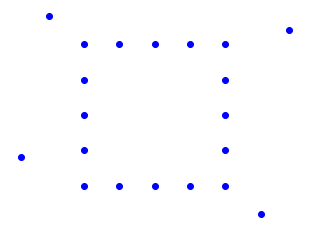

In [45]:
outliers_list = [City(2, 2),  City(2, 3),  City(2, 4),  City(2, 5),  City(2, 6),  
                 City(3, 6),  City(4, 6),  City(5, 6),  City(6, 6),  
                 City(6, 5),  City(6, 4),  City(6, 3),  City(6, 2),  
                 City(5, 2),  City(4, 2),  City(3, 2),  
                 City(1, 6.8),  City(7.8, 6.4),  City(7, 1.2),  City(0.2, 2.8)]

outliers = set(outliers_list)

plot_lines(outliers, 'bo')

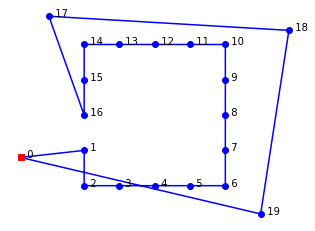

20 city tour with length 38.8 in 0.016 secs for nn_tsp


In [46]:
plot_tsp(nn_tsp, outliers)

In [48]:
def plot_labeled_lines(points, *args):
    """Plot individual points, labeled with an index number.
    Then, args describe lines to draw between those points.
    An arg can be a matplotlib style, like 'ro--', which sets the style until changed,
    or it can be a list of indexes of points, like [0, 1, 2], saying what line to draw."""
    # Draw points and label them with their index number
    plot_lines(points, 'bo')
    for (label, p) in enumerate(points):
        plt.text(X(p), Y(p), '  '+str(label))
    # Draw lines indicated by args
    style = 'bo-'
    for arg in args:
        if isinstance(arg, str):
            style = arg
        else: # arg is a list of indexes into points, forming a line
            Xs = [X(points[i]) for i in arg]
            Ys = [Y(points[i]) for i in arg]
            plt.plot(Xs, Ys, style)
    plt.axis('scaled'); plt.axis('off'); plt.show()        

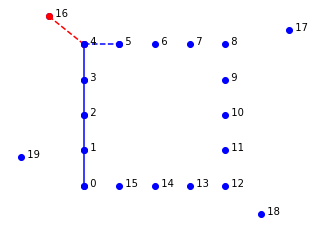

In [49]:
plot_labeled_lines(outliers_list, 'bo-', [0, 1, 2, 3, 4], 'ro--', [4, 16], 'bo--', [4, 5])

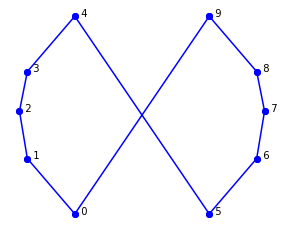

In [50]:
cross = [City(9, 3),  City(3, 10),  City(2, 16),  City(3, 21),  City(9, 28), 
         City(26, 3), City(32, 10), City(33, 16), City(32, 21), City(26, 28)]

plot_labeled_lines(cross, range(-1,10))

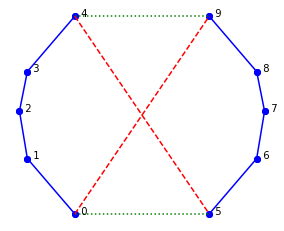

In [51]:
plot_labeled_lines(cross, 'bo-', range(5), range(5, 10), 
                          'g:', (4, 9), (0, 5), 
                          'r--', (4, 5), (0, 9))

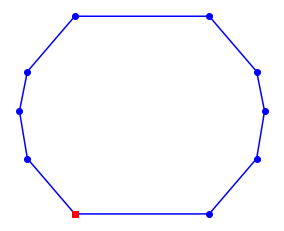

In [52]:
tour = Tour(cross)
tour[5:10] = reversed( tour[5:10])
plot_tour(tour)

In [53]:
def reverse_segment_if_better(tour, i, j):
    "If reversing tour[i:j] would make the tour shorter, then do it." 
    # Given tour [...A-B...C-D...], consider reversing B...C to get [...A-C...B-D...]
    A, B, C, D = tour[i-1], tour[i], tour[j-1], tour[j % len(tour)]
    # Are old edges (AB + CD) longer than new ones (AC + BD)? If so, reverse segment.
    if distance(A, B) + distance(C, D) > distance(A, C) + distance(B, D):
        tour[i:j] = reversed(tour[i:j])

In [54]:
def alter_tour(tour):
    "Try to alter tour for the better by reversing segments."
    original_length = tour_length(tour)
    for (start, end) in all_segments(len(tour)):
        reverse_segment_if_better(tour, start, end)
    # If we made an improvement, then try again; else stop and return tour.
    if tour_length(t
                   our) < original_length:
        return alter_tour(tour)
    return tour 

def all_segments(N):
    "Return (start, end) pairs of indexes that form segments of tour of length N."
    return [(start, start + length)
            for length in range(N, 2-1, -1)
            for start in range(N - length + 1)]

Here is what the list of all segments look like, for N=4:

In [55]:
all_segments(4)

[(0, 4), (0, 3), (1, 4), (0, 2), (1, 3), (2, 4)]

We can see that altering the cross tour does straighten it out:

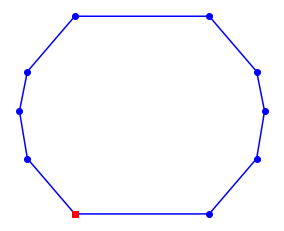

In [56]:
plot_tour(alter_tour(Tour(cross)))

Altered Nearest Neighbor Algorithm (`altered_nn_tsp`)
----

Let's see what happens when we alter the output of `nn_tsp`:

In [57]:
def altered_nn_tsp(cities):
    "Run nearest neighbor TSP algorithm, and alter the results by reversing segments."
    return alter_tour(nn_tsp(cities))

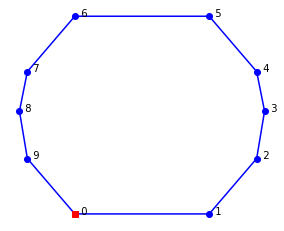

10 city tour with length 93.2 in 0.031 secs for altered_nn_tsp


In [60]:
plot_tsp(altered_nn_tsp, set(cross))

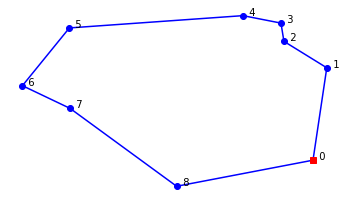

9 city tour with length 2075.1 in 0.016 secs for altered_nn_tsp


In [61]:
plot_tsp(altered_nn_tsp, Cities(9))

It gets the optimal results.  Let's try benchmarking:

In [62]:
algorithms = [nn_tsp, repeat_50_nn_tsp, altered_nn_tsp]

benchmarks(algorithms)

                   nn_tsp | 5640.7 ± 504 ( 4511 to  6799) |  0.001 secs/map | 30 ⨉ 60-city maps
         repeat_50_nn_tsp | 5168.4 ± 349 ( 4381 to  5880) |  0.024 secs/map | 30 ⨉ 60-city maps
           altered_nn_tsp | 4813.6 ± 251 ( 4309 to  5447) |  0.007 secs/map | 30 ⨉ 60-city maps


Altered Repeated Nearest Neighbor Algorithm (`altered_repeated_nn_tsp`)
---


In [63]:
def repeated_altered_nn_tsp(cities, repetitions=20): 
    "Use alteration to improve each repetition of nearest neighbors."
    return shortest_tour(alter_tour(nn_tsp(cities, start)) 
                         for start in sample(cities, repetitions))

def repeat_5_altered_nn_tsp(cities): return repeated_altered_nn_tsp(cities, 5)

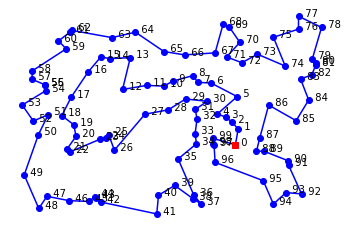

100 city tour with length 5701.6 in 0.516 secs for repeated_altered_nn_tsp


In [64]:
plot_tsp(repeated_altered_nn_tsp, Cities(100))

In [65]:
algorithms = [nn_tsp, repeat_50_nn_tsp, altered_nn_tsp, repeated_altered_nn_tsp]

benchmarks(algorithms)
print('-' * 100)
benchmarks(algorithms, Maps(30, 120))

                   nn_tsp | 5640.7 ± 504 ( 4511 to  6799) |  0.001 secs/map | 30 ⨉ 60-city maps
         repeat_50_nn_tsp | 5168.4 ± 349 ( 4381 to  5880) |  0.024 secs/map | 30 ⨉ 60-city maps
           altered_nn_tsp | 4813.6 ± 251 ( 4309 to  5447) |  0.007 secs/map | 30 ⨉ 60-city maps
  repeated_altered_nn_tsp | 4638.5 ± 222 ( 4173 to  5193) |  0.145 secs/map | 30 ⨉ 60-city maps
----------------------------------------------------------------------------------------------------
                   nn_tsp | 7855.9 ± 438 ( 7082 to  8780) |  0.002 secs/map | 30 ⨉ 120-city maps
         repeat_50_nn_tsp | 7270.4 ± 285 ( 6467 to  7942) |  0.092 secs/map | 30 ⨉ 120-city maps
           altered_nn_tsp | 6619.7 ± 202 ( 6103 to  7005) |  0.034 secs/map | 30 ⨉ 120-city maps
  repeated_altered_nn_tsp | 6369.1 ± 186 ( 5927 to  6642) |  0.683 secs/map | 30 ⨉ 120-city maps


Non-Random Maps
====

In [66]:
def lines(text): return text.strip().splitlines()

def Coordinate_map(lines, delimiter=' ', lat_col=1, long_col=2, lat_scale=69, long_scale=-48):
    """Make a set of Cities from an iterable of lines of text.
    Specify the column delimiter, and the zero-based column number of lat and long.
    Treat long/lat as a square x/y grid, scaled by long_scale and lat_scale.
    Source can be a file object, or list of lines."""
    return frozenset(City(long_scale * float(row[long_col]), 
                          lat_scale  * float(row[lat_col]))
                     for row in csv.reader(lines, delimiter=delimiter, skipinitialspace=True))

In [67]:
USA_map = Coordinate_map(lines("""
[TCL]  33.23   87.62  Tuscaloosa,AL
[FLG]  35.13  111.67  Flagstaff,AZ
[PHX]  33.43  112.02  Phoenix,AZ
[PGA]  36.93  111.45  Page,AZ
[TUS]  32.12  110.93  Tucson,AZ
[LIT]  35.22   92.38  Little Rock,AR
[SFO]  37.62  122.38  San Francisco,CA
[LAX]  33.93  118.40  Los Angeles,CA
[SAC]  38.52  121.50  Sacramento,CA
[SAN]  32.73  117.17  San Diego,CA
[SBP]  35.23  120.65  San Luis Obi,CA
[EKA]  41.33  124.28  Eureka,CA
[DEN]  39.75  104.87  Denver,CO
[DCA]  38.85   77.04  Washington/Natl,DC
[MIA]  25.82   80.28  Miami Intl,FL
[TPA]  27.97   82.53  Tampa Intl,FL
[JAX]  30.50   81.70  Jacksonville,FL
[TLH]  30.38   84.37  Tallahassee,FL
[ATL]  33.65   84.42  Atlanta,GA
[BOI]  43.57  116.22  Boise,ID
[CHI]  41.90   87.65  Chicago,IL
[IND]  39.73   86.27  Indianapolis,IN
[DSM]  41.53   93.65  Des Moines,IA
[SUX]  42.40   96.38  Sioux City,IA
[ICT]  37.65   97.43  Wichita,KS
[LEX]  38.05   85.00  Lexington,KY
[NEW]  30.03   90.03  New Orleans,LA
[BOS]  42.37   71.03  Boston,MA
[PWM]  43.65   70.32  Portland,ME
[BGR]  44.80   68.82  Bangor,ME
[CAR]  46.87   68.02  Caribou Mun,ME
[DET]  42.42   83.02  Detroit,MI
[STC]  45.55   94.07  St Cloud,MN
[DLH]  46.83   92.18  Duluth,MN
[STL]  38.75   90.37  St Louis,MO
[JAN]  32.32   90.08  Jackson,MS
[BIL]  45.80  108.53  Billings,MT
[BTM]  45.95  112.50  Butte,MT
[RDU]  35.87   78.78  Raleigh-Durh,NC
[INT]  36.13   80.23  Winston-Salem,NC
[OMA]  41.30   95.90  Omaha/Eppley,NE
[LAS]  36.08  115.17  Las Vegas,NV
[RNO]  39.50  119.78  Reno,NV
[AWH]  41.33  116.25  Wildhorse,NV
[EWR]  40.70   74.17  Newark Intl,NJ
[SAF]  35.62  106.08  Santa Fe,NM
[NYC]  40.77   73.98  New York,NY
[BUF]  42.93   78.73  Buffalo,NY
[ALB]  42.75   73.80  Albany,NY
[FAR]  46.90   96.80  Fargo,ND
[BIS]  46.77  100.75  Bismarck,ND
[CVG]  39.05   84.67  Cincinnati,OH
[CLE]  41.42   81.87  Cleveland,OH
[OKC]  35.40   97.60  Oklahoma Cty,OK
[PDX]  45.60  122.60  Portland,OR
[MFR]  42.37  122.87  Medford,OR
[AGC]  40.35   79.93  Pittsburgh,PA
[PVD]  41.73   71.43  Providence,RI
[CHS]  32.90   80.03  Charleston,SC
[RAP]  44.05  103.07  Rapid City,SD
[FSD]  43.58   96.73  Sioux Falls,SD
[MEM]  35.05   90.00  Memphis Intl,TN
[TYS]  35.82   83.98  Knoxville,TN
[CRP]  27.77   97.50  Corpus Chrst,TX
[DRT]  29.37  100.92  Del Rio,TX
[IAH]  29.97   95.35  Houston,TX
[SAT]  29.53   98.47  San Antonio,TX
[LGU]  41.78  111.85  Logan,UT
[SLC]  40.78  111.97  Salt Lake Ct,UT
[SGU]  37.08  113.60  Saint George,UT
[CNY]  38.77  109.75  Moab,UT
[MPV]  44.20   72.57  Montpelier,VT
[RIC]  37.50   77.33  Richmond,VA
[BLI]  48.80  122.53  Bellingham,WA
[SEA]  47.45  122.30  Seattle,WA
[ALW]  46.10  118.28  Walla Walla,WA
[GRB]  44.48   88.13  Green Bay,WI
[MKE]  42.95   87.90  Milwaukee,WI
[CYS]  41.15  104.82  Cheyenne,WY
[SHR]  44.77  106.97  Sheridan,WY
"""))

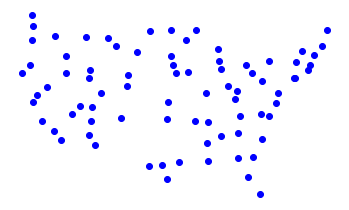

In [68]:
plot_lines(USA_map, 'bo')

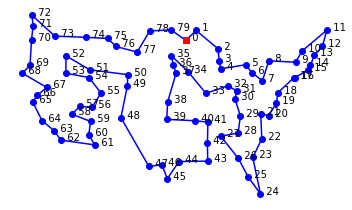

80 city tour with length 13563.9 in 0.312 secs for repeated_altered_nn_tsp


In [69]:
plot_tsp(repeated_altered_nn_tsp, USA_map)

In [70]:
USA_landmarks_map = Coordinate_map(lines("""
Mount Rushmore National Memorial, South Dakota 244, Keystone, SD	43.879102	-103.459067
Toltec Mounds, Scott, AR	34.647037	-92.065143
Ashfall Fossil Bed, Royal, NE	42.425000	-98.158611
Maryland State House, 100 State Cir, Annapolis, MD 21401	38.978828	-76.490974
The Mark Twain House & Museum, Farmington Avenue, Hartford, CT	41.766759	-72.701173
Columbia River Gorge National Scenic Area, Oregon	45.711564	-121.519633
Mammoth Cave National Park, Mammoth Cave Pkwy, Mammoth Cave, KY	37.186998	-86.100528
Bryce Canyon National Park, Hwy 63, Bryce, UT	37.593038	-112.187089
USS Alabama, Battleship Parkway, Mobile, AL	30.681803	-88.014426
Graceland, Elvis Presley Boulevard, Memphis, TN	35.047691	-90.026049
Wright Brothers National Memorial Visitor Center, Manteo, NC	35.908226	-75.675730
Vicksburg National Military Park, Clay Street, Vicksburg, MS	32.346550	-90.849850
Statue of Liberty, Liberty Island, NYC, NY	40.689249	-74.044500
Mount Vernon, Fairfax County, Virginia	38.729314	-77.107386
Fort Union Trading Post National Historic Site, Williston, North Dakota 1804, ND	48.000160	-104.041483
San Andreas Fault, San Benito County, CA	36.576088	-120.987632
Chickasaw National Recreation Area, 1008 W 2nd St, Sulphur, OK 73086	34.457043	-97.012213
Hanford Site, Benton County, WA	46.550684	-119.488974
Spring Grove Cemetery, Spring Grove Avenue, Cincinnati, OH	39.174331	-84.524997
Craters of the Moon National Monument & Preserve, Arco, ID	43.416650	-113.516650
The Alamo, Alamo Plaza, San Antonio, TX	29.425967	-98.486142
New Castle Historic District, Delaware	38.910832	-75.527670
Gateway Arch, Washington Avenue, St Louis, MO	38.624647	-90.184992
West Baden Springs Hotel, West Baden Avenue, West Baden Springs, IN	38.566697	-86.617524
Carlsbad Caverns National Park, Carlsbad, NM	32.123169	-104.587450
Pikes Peak, Colorado	38.840871	-105.042260
Okefenokee Swamp Park, Okefenokee Swamp Park Road, Waycross, GA	31.056794	-82.272327
Cape Canaveral, FL	28.388333	-80.603611
Glacier National Park, West Glacier, MT	48.759613	-113.787023
Congress Hall, Congress Place, Cape May, NJ 08204	38.931843	-74.924184
Olympia Entertainment, Woodward Avenue, Detroit, MI	42.387579	-83.084943
Fort Snelling, Tower Avenue, Saint Paul, MN	44.892850	-93.180627
Hoover Dam, Boulder City, CO	36.012638	-114.742225
White House, Pennsylvania Avenue Northwest, Washington, DC	38.897676	-77.036530
USS Constitution, Boston, MA	42.372470	-71.056575
Omni Mount Washington Resort, Mount Washington Hotel Road, Bretton Woods, NH	44.258120	-71.441189
Grand Canyon National Park, Arizona	36.106965	-112.112997
The Breakers, Ochre Point Avenue, Newport, RI	41.469858	-71.298265
Fort Sumter National Monument, Sullivan's Island, SC	32.752348	-79.874692
Cable Car Museum, 94108, 1201 Mason St, San Francisco, CA 94108	37.794781	-122.411715
Yellowstone National Park, WY 82190	44.462085	-110.642441
French Quarter, New Orleans, LA	29.958443	-90.064411
C. W. Parker Carousel Museum, South Esplanade Street, Leavenworth, KS	39.317245	-94.909536
Shelburne Farms, Harbor Road, Shelburne, VT	44.408948	-73.247227
Taliesin, County Road C, Spring Green, Wisconsin	43.141031	-90.070467
Acadia National Park, Maine	44.338556	-68.273335
Liberty Bell, 6th Street, Philadelphia, PA	39.949610	-75.150282
Terrace Hill, Grand Avenue, Des Moines, IA	41.583218	-93.648542
Lincoln Home National Historic Site Visitor Center, 426 South 7th Street, Springfield, IL	39.797501	-89.646211
Lost World Caverns, Lewisburg, WV	37.801788	-80.445630
"""), delimiter='\t', long_scale=48)

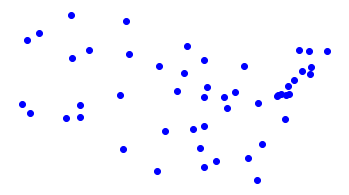

In [72]:
plot_lines(USA_landmarks_map, 'bo')

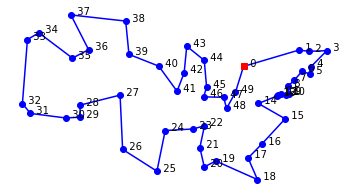

50 city tour with length 10236.7 in 0.156 secs for repeated_altered_nn_tsp


In [73]:
plot_tsp(repeated_altered_nn_tsp, USA_landmarks_map)

# >>> Greedy Algorithm (`greedy_tsp`)

In [74]:
def greedy_tsp(cities):
    """Go through edges, shortest first. Use edge to join segments if possible."""
    edges = shortest_edges_first(cities) # A list of (A, B) pairs
    endpoints = {c: [c] for c in cities} # A dict of {endpoint: segment}
    for (A, B) in edges:
        if A in endpoints and B in endpoints and endpoints[A] != endpoints[B]:
            new_segment = join_endpoints(endpoints, A, B)
            if len(new_segment) == len(cities):
                return new_segment
            
# TO DO: functions: shortest_edges_first, join_endpoints

In [75]:
def shortest_edges_first(cities):
    "Return all edges between distinct cities, sorted shortest first."
    edges = [(A, B) for A in cities for B in cities 
                    if id(A) < id(B)]
    return sorted(edges, key=lambda edge: distance(*edge))


In [76]:
def join_endpoints(endpoints, A, B):
    "Join B's segment onto the end of A's and return the segment. Maintain endpoints dict."
    Asegment, Bsegment = endpoints[A], endpoints[B]
    if Asegment[-1] is not A: Asegment.reverse()
    if Bsegment[0] is not B: Bsegment.reverse()
    Asegment.extend(Bsegment)
    del endpoints[A], endpoints[B]
    endpoints[Asegment[0]] = endpoints[Asegment[-1]] = Asegment
    return Asegment


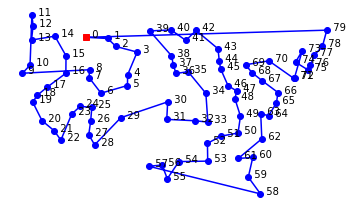

80 city tour with length 16087.5 in 0.031 secs for greedy_tsp


In [77]:
plot_tsp(greedy_tsp, USA_map)

In [78]:
def altered_greedy_tsp(cities):
    "Run greedy TSP algorithm, and alter the results by reversing segments."
    return alter_tour(greedy_tsp(cities))

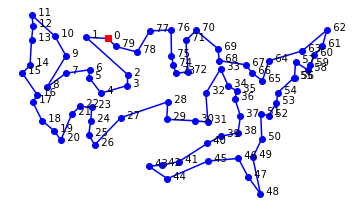

80 city tour with length 14220.1 in 0.062 secs for altered_greedy_tsp


In [79]:
plot_tsp(altered_greedy_tsp, USA_map)

In [80]:
algorithms = [altered_nn_tsp, altered_greedy_tsp, repeated_altered_nn_tsp]

benchmarks(algorithms)
print('-' * 100)
benchmarks(algorithms, Maps(30, 120))

           altered_nn_tsp | 4813.6 ± 251 ( 4309 to  5447) |  0.007 secs/map | 30 ⨉ 60-city maps
       altered_greedy_tsp | 4766.4 ± 224 ( 4276 to  5271) |  0.008 secs/map | 30 ⨉ 60-city maps
  repeated_altered_nn_tsp | 4638.5 ± 222 ( 4173 to  5193) |  0.145 secs/map | 30 ⨉ 60-city maps
----------------------------------------------------------------------------------------------------
           altered_nn_tsp | 6619.7 ± 202 ( 6103 to  7005) |  0.034 secs/map | 30 ⨉ 120-city maps
       altered_greedy_tsp | 6506.8 ± 224 ( 6038 to  6970) |  0.035 secs/map | 30 ⨉ 120-city maps
  repeated_altered_nn_tsp | 6369.1 ± 186 ( 5927 to  6642) |  0.683 secs/map | 30 ⨉ 120-city maps


In [81]:
def visualize_greedy_tsp(cities, plot_sizes):
    """Go through edges, shortest first. Use edge to join segments if possible.
    Plot segments at specified sizes."""
    edges = shortest_edges_first(cities) # A list of (A, B) pairs
    endpoints = {c: [c] for c in cities} # A dict of {endpoint: segment}
    for (A, B) in edges:
        if A in endpoints and B in endpoints and endpoints[A] != endpoints[B]:
            new_segment = join_endpoints(endpoints, A, B)
            plot_segments(endpoints, plot_sizes, distance(A, B)) # <<<< NEW
            if len(new_segment) == len(cities):
                return new_segment
        
def plot_segments(endpoints, plot_sizes, dist):
    "If the number of distinct segments is one of plot_sizes, then plot segments."
    segments = set(map(tuple, endpoints.values()))
    if len(segments) in plot_sizes:
        map(plot_lines, segments); plt.show()
        print('{} segments, longest edge = {:.0f}'.format(
              len(segments), dist))

In [82]:
visualize_greedy_tsp(USA_map, (60, 40, 20, 10, 5, 2));

60 segments, longest edge = 104
40 segments, longest edge = 148
20 segments, longest edge = 210
10 segments, longest edge = 255
5 segments, longest edge = 335
2 segments, longest edge = 597


<h2>Divide and Conquer Strategy</h2>

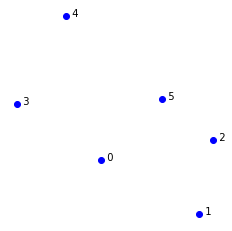

In [83]:
cities = list(Cities(6))
plot_labeled_lines(cities)

In [84]:
def dq_tsp(cities):
    """Find a tour by divide and conquer: if number of cities is below threshold,
    find a tour with solver.  Otherwise, split the cities in half, solve each
    half recursively, then join those two tours together."""
    if len(cities) <= 3:
        return Tour(cities)
    else:
        Cs1, Cs2 = split_cities(cities)
        return join_tours(dq_tsp(Cs1), dq_tsp(Cs2))
    
# TO DO: functions: split_cities, join_tours

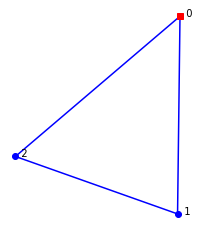

3 city tour with length 1203.4 in 0.016 secs for dq_tsp


In [85]:
plot_tsp(dq_tsp, Cities(3))

In [86]:
def split_cities(cities):
    "Split cities vertically if map is wider; horizontally if map is taller."
    width, height = extent(list(map(X, cities))), extent(list(map(Y, cities)))
    key = X if (width > height) else Y
    cities = sorted(cities, key=key)
    mid = len(cities) // 2
    return frozenset(cities[:mid]), frozenset(cities[mid:])

def extent(numbers): return max(numbers) - min(numbers)

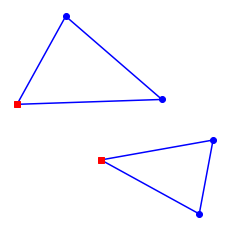

In [87]:
Cs1, Cs2 = split_cities(cities)
plot_tour(dq_tsp(Cs1))
plot_tour(dq_tsp(Cs2))

In [88]:
def join_tours(tour1, tour2):
    "Consider all ways of joining the two tours together, and pick the shortest."
    segments1, segments2 = rotations(tour1), rotations(tour2)
    tours = [s1 + s2
             for s1 in segments1
             for s  in segments2
             for s2 in (s, s[::-1])]
    return shortest_tour(tours)

def rotations(sequence):
    "All possible rotations of a sequence."
    # A rotation is some suffix of the sequence followed by the rest of the sequence.
    return [sequence[i:] + sequence[:i] for i in range(len(sequence))]

Let's see if it works, first on the 6 city example:

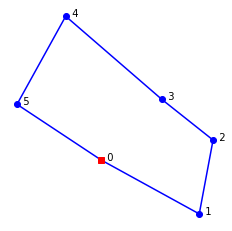

6 city tour with length 1431.7 in 0.016 secs for dq_tsp


In [89]:
plot_tsp(dq_tsp, Cities(6))

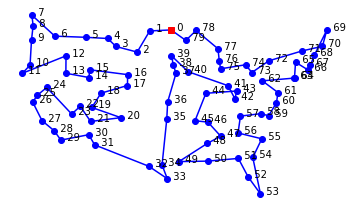

80 city tour with length 14883.2 in 0.125 secs for dq_tsp


In [90]:
plot_tsp(dq_tsp, USA_map)

In [91]:
def altered_dq_tsp(cities): return alter_tour(dq_tsp(cities))

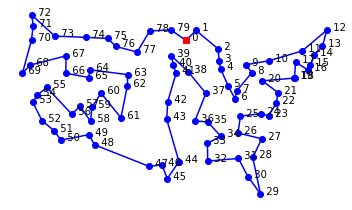

80 city tour with length 14209.6 in 0.125 secs for altered_dq_tsp


In [92]:
plot_tsp(altered_dq_tsp, USA_map)

In [93]:
algorithms = [nn_tsp, greedy_tsp, dq_tsp, 
              altered_dq_tsp, altered_nn_tsp, altered_greedy_tsp,   
              repeated_altered_nn_tsp]

benchmarks(algorithms, (USA_map,))

                   nn_tsp |16069.9 ±   0 (16070 to 16070) |  0.000 secs/map | 1 ⨉ 80-city maps
               greedy_tsp |16087.5 ±   0 (16088 to 16088) |  0.062 secs/map | 1 ⨉ 80-city maps
                   dq_tsp |14883.2 ±   0 (14883 to 14883) |  0.094 secs/map | 1 ⨉ 80-city maps
           altered_dq_tsp |14209.6 ±   0 (14210 to 14210) |  0.094 secs/map | 1 ⨉ 80-city maps
           altered_nn_tsp |13704.0 ±   0 (13704 to 13704) |  0.031 secs/map | 1 ⨉ 80-city maps
       altered_greedy_tsp |14220.1 ±   0 (14220 to 14220) |  0.016 secs/map | 1 ⨉ 80-city maps
  repeated_altered_nn_tsp |13563.9 ±   0 (13564 to 13564) |  0.281 secs/map | 1 ⨉ 80-city maps


In [94]:
benchmarks(algorithms)

                   nn_tsp | 5640.7 ± 504 ( 4511 to  6799) |  0.001 secs/map | 30 ⨉ 60-city maps
               greedy_tsp | 5445.0 ± 399 ( 4715 to  6305) |  0.002 secs/map | 30 ⨉ 60-city maps
                   dq_tsp | 5177.0 ± 272 ( 4716 to  5941) |  0.039 secs/map | 30 ⨉ 60-city maps
           altered_dq_tsp | 4871.2 ± 271 ( 4327 to  5507) |  0.046 secs/map | 30 ⨉ 60-city maps
           altered_nn_tsp | 4813.6 ± 251 ( 4309 to  5447) |  0.007 secs/map | 30 ⨉ 60-city maps
       altered_greedy_tsp | 4766.4 ± 224 ( 4276 to  5271) |  0.008 secs/map | 30 ⨉ 60-city maps
  repeated_altered_nn_tsp | 4638.5 ± 222 ( 4173 to  5193) |  0.145 secs/map | 30 ⨉ 60-city maps


# Minimum Spanning Tree Traversal Algorithm to solve TSP (`mst_tsp`)

### 1- Get the minimum spanning tree for your graph

In [95]:
def mst(vertexes):
    """Given a set of vertexes, build a minimum spanning tree: a dict of the form {parent: [child...]}, 
    where parent and children are vertexes, and the root of the tree is first(vertexes)."""
    tree  = {first(vertexes): []} # the first city is the root of the tree.
    edges = shortest_edges_first(vertexes)
    while len(tree) < len(vertexes):
        (A, B) = shortest_usable_edge(edges, tree)
        tree[A].append(B)
        tree[B] = []
    return tree

def shortest_usable_edge(edges, tree):
    "Find the ehortest edge (A, B) where A is in tree and B is not."
    (A, B) = first((A, B) for (A, B) in edges if (A in tree) ^ (B in tree)) # ^ is "xor" 
    return (A, B) if (A in tree) else (B, A)

def shortest_edges_first(cities):
    "Return all edges between distinct cities, sorted shortest first."
    edges = [(A, B) for A in cities for B in cities 
                    if id(A) < id(B)]
    return sorted(edges, key=lambda edge: distance(*edge))

def first(collection):
    "Start iterating over collection, and return the first element."
    return next(iter(collection))


In [96]:
# tour in blue while graph is in red

def plot_graph(graph):
    "Given a graph of the form {parent: [child...]}, plot the vertexes and edges."
    vertexes = {v for parent in graph for v in graph[parent]} | set(graph)
    edges = {(parent, child) for parent in graph for child in graph[parent]}
    for edge in edges:
        plot_lines(edge, 'ro-')
    total_length = sum(distance(p, c) for (p, c) in edges)
    print('{} node Graph of total length: {:.1f}'.format(len(vertexes), total_length))

80 node Graph of total length: 11518.4


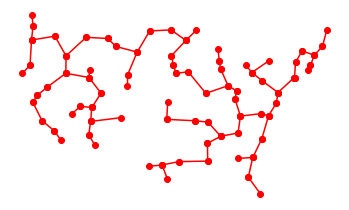

In [97]:
plot_graph(mst(USA_map))

### 2-Get the tour from the minimum spanning tree using pre-order traversal

In [98]:
def preorder_traversal(tree, root):
    "Traverse tree in pre-order, starting at root of tree."
    result = [root]
    for child in tree.get(root, ()):
        result.extend(preorder_traversal(tree, child))
    return result

def mst_tsp(cities):
    "Create a minimum spanning tree and walk it in pre-order, omitting duplicates."
    return preorder_traversal(tree=mst(cities), root=first(cities))

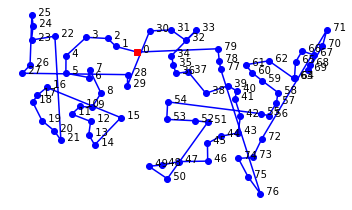

80 city tour with length 18335.3 in 0.062 secs for mst_tsp


In [99]:
plot_tsp(mst_tsp, USA_map)

### Altered tour using minimium spanning tree to get a better solution

In [100]:
def alter_tour(tour):
    "Try to alter tour for the better by reversing segments."
    original_length = tour_length(tour)
    for (start, end) in all_segments(len(tour)):
        reverse_segment_if_better(tour, start, end)
    # If we made an improvement, then try again; else stop and return tour.
    if tour_length(tour) < original_length:
        return alter_tour(tour)
    return tour
def all_segments(N):
    "Return (start, end) pairs of indexes that form segments of tour of length N."
    return [(start, start + length)
            for length in range(N, 2-1, -1)
            for start in range(N - length + 1)]
def reverse_segment_if_better(tour, i, j):
    "If reversing tour[i:j] would make the tour shorter, then do it." 
    # Given tour [...A-B...C-D...], consider reversing B...C to get [...A-C...B-D...]
    A, B, C, D = tour[i-1], tour[i], tour[j-1], tour[j % len(tour)]
    # Are old edges (AB + CD) longer than new ones (AC + BD)? If so, reverse segment.
    if distance(A, B) + distance(C, D) > distance(A, C) + distance(B, D):
        tour[i:j] = reversed(tour[i:j])


In [101]:
def altered_mst_tsp(cities): 
    return alter_tour(mst_tsp(cities))

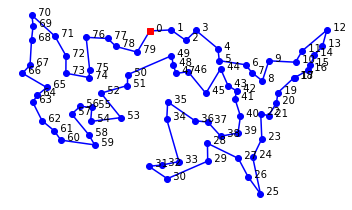

80 city tour with length 13859.7 in 0.062 secs for altered_mst_tsp


In [102]:
plot_tsp(altered_mst_tsp, USA_map)

<h1> Shoulders of Giants: Held-Karp Algorithm (hk_tsp)</h1>

In [103]:
def hk_tsp(cities):
    """The shortest tour of this set of cities, using the Held-Karp approach.
    For each end city C, find the shortest segment from A (the start) to C.
    Out of all these shortest segments, pick the one that is the shortest tour."""
    A = first(cities)
    segments = [shortest_segment(A, cities - {A, C}, C)
                for C in cities if C is not A]
    return shortest_tour(segments)

# TO DO: function: shortest_segment(A, Bs, C)

In [104]:
@memoize
def shortest_segment(A, Bs, C):
    "The shortest segment starting at A, going through all Bs, and ending at C."
    if not Bs:
        return [A, C]
    else:
        segments = [shortest_segment(A, Bs - {B}, B) + [C] 
                    for B in Bs]
        return min(segments, key=segment_length)
            
def segment_length(segment):
    "The total of distances between each pair of consecutive cities in the segment."
    # Same as tour_length, but without distance(tour[0], tour[-1])
    return sum(distance(segment[i], segment[i-1]) 
               for i in range(1, len(segment)))

In [105]:
def plot_tour(tour):
    "Plot the cities as circles and the tour as lines between them. Start city is red square."
    start = tour[0]
    plot_lines(list(tour) + [start])
    plot_lines([start], 'rs') # Mark the start city with a red square

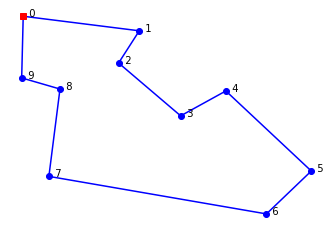

10 city tour with length 2291.8 in 1.438 secs for alltours_tsp


In [106]:
plot_tsp(alltours_tsp, Cities(10))

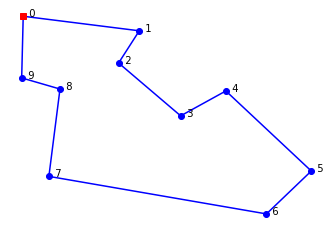

10 city tour with length 2291.8 in 0.047 secs for hk_tsp


In [107]:
plot_tsp(hk_tsp, Cities(10))

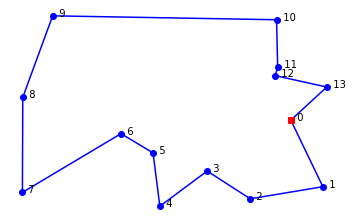

14 city tour with length 2886.6 in 1.344 secs for hk_tsp


In [108]:
plot_tsp(hk_tsp, Cities(14))

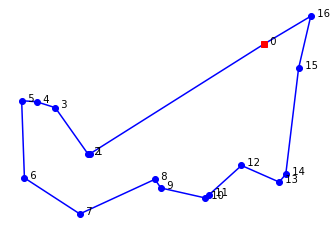

17 city tour with length 2586.9 in 18.516 secs for hk_tsp


In [109]:
plot_tsp(hk_tsp, Cities(17))

<h2>Ensembles of Other Algorithms (`ensemble_tsp`)</h2>


In [110]:
ensemble = [altered_dq_tsp, altered_greedy_tsp, altered_mst_tsp, repeated_altered_nn_tsp]

def ensemble_tsp(cities, threshold=16, algorithms=ensemble): 
    "Apply all algorithms to cities and take the shortest resulting tour."
    if len(cities) <= threshold:
        return hk_tsp(cities)
    else:
        return shortest_tour(tsp(cities) for tsp in algorithms)

Let's go to the benchmarks:

In [111]:
benchmarks(ensemble + [ensemble_tsp])

           altered_dq_tsp | 4871.2 ± 271 ( 4327 to  5507) |  0.046 secs/map | 30 ⨉ 60-city maps
       altered_greedy_tsp | 4766.4 ± 224 ( 4276 to  5271) |  0.008 secs/map | 30 ⨉ 60-city maps
          altered_mst_tsp | 4814.2 ± 271 ( 4217 to  5373) |  0.009 secs/map | 30 ⨉ 60-city maps
  repeated_altered_nn_tsp | 4638.5 ± 222 ( 4173 to  5193) |  0.145 secs/map | 30 ⨉ 60-city maps
             ensemble_tsp | 4625.6 ± 217 ( 4173 to  5193) |  0.207 secs/map | 30 ⨉ 60-city maps


In [ ]:
benchmarks(ensemble + [ensemble_tsp], Maps(30, 120))

           altered_dq_tsp | 6741.0 ± 221 ( 6066 to  7119) |  0.359 secs/map | 30 ⨉ 120-city maps
       altered_greedy_tsp | 6506.8 ± 224 ( 6038 to  6970) |  0.035 secs/map | 30 ⨉ 120-city maps
          altered_mst_tsp | 6612.9 ± 209 ( 6299 to  7114) |  0.042 secs/map | 30 ⨉ 120-city maps
  repeated_altered_nn_tsp | 6369.1 ± 186 ( 5927 to  6642) |  0.683 secs/map | 30 ⨉ 120-city maps


In [ ]:
benchmarks(ensemble + [ensemble_tsp], (USA_map,))

In [ ]:
plot_tsp(lambda cities: repeated_altered_nn_tsp(cities, 80), USA_map)

In [ ]:
benchmarks([altered_greedy_tsp, altered_mst_tsp, repeated_altered_nn_tsp], (USA_landmarks_map,))